# OBJECTIVE

**Business Objective**

- To predict the spending of customers.


**Business Constrain**

- Minimize computing resources.

#### Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
from math import sqrt


#visualizing
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline


from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

### Dataset Information

This dataset is atleast 5 years old and is a retail store in the US. It contains 550,068 transactions made by a total of 5,891 customers. Kaggle project 

Attribute Information:
   1.  User ID 
       - 5891 users
   2.  Product ID 
       - 3631 products
   3.  Gender 
       - Male
       - Female
   4.  Age 
       - 0-17
       - 18-25
       - 26-35
       - 36-45
       - 46-50
       - 51-55
       - 55+
   5.  Occupation 
          - 20 Diffrent Occupation
   6.  City Category
          - City Category A
          - City Category B
          - City Category C
   7.  Stay in current city (years)
          - 1 Year
          - 2 Year
          - 3 Year
          - 4+ Year
   8.  Marital Status
          - Married
          - Not Married
   9.  Product Category 1
          - 20 Categories
   10. Product Category 2
          - 18 Categories
   11. Product Category 3
          - 16 Categories
   12. Purchase
          - Price in USD between 12 - 23,961


#### Load and Understanding the Datasets 

In [2]:
sale = pd.read_csv('BlackFriday.csv')
sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# create a copy of the dataset
data = sale.copy()

In [4]:
data.columns.values.tolist()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [5]:
# Check the dataset size
data.shape

(550068, 12)

Insight:

- There are 12 columns and 550,068 rows.

In [6]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Insight:
    
- The dataset has 5 features as object, 5 features as integers, and 2 features as float.
- There are missing values within the dataset.Look at the number of rows in Product_Category_2, and 3.

#### Summarize Dataset

In [7]:
#statistic summary
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0


Insight:

- The top Product_ID is POO265242.
- The top Gender is Male (M).
- The top Age group is 26-35.
- Most customer Occupation are 14.0 75%.
- The top City_Category is B.
- The top number of Stay_in_Current_City_Years is 1.
- Most of our customers are Married (1) 75%.
- More than 75% of customers bought Product_Category_1 8.0 times.
- More than 75% of customers bought Product_Category_2 15.0 times.
- More than 75% of customers bought Product_Category_3 16.0 times.
- 50% of the users have purcahses of 8047.0 currnecy units.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
# Distribution of categorical data
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nFrequency of categories in {col}:\n{data[col].value_counts()}")


Frequency of categories in Product_ID:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

Frequency of categories in Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64

Frequency of categories in Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Frequency of categories in City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

Frequency of categories in Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


#### Check for Duplicates

In [10]:
data.duplicated().sum()

0

Insight:

- There are no duplicated records within the dataset.

#### Identify Missing Values

In [11]:
# checking if there is any NULL values present in the dataset
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
## percentage of NaN for the dataset
data.isna().mean().round(4).mul(100).sort_values(ascending=False)

Product_Category_3            69.67
Product_Category_2            31.57
User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Purchase                       0.00
dtype: float64

Insight:
- About 70% of Product_Category_3 are NaN values. While about 32% of Product_Category_2 are NaN values.

In [13]:
# create a copy of the dataset
df = data.copy()


# Finding unique values for specified columns
unique_values_pc1 = df['Product_Category_1'].unique()
unique_values_pc2 = df['Product_Category_2'].unique()
unique_values_pc3 = df['Product_Category_3'].unique()

# Printing the unique values
print("Unique values in Product_Category_1:", unique_values_pc1)
print("Unique values in Product_Category_2:", unique_values_pc2)
print("Unique values in Product_Category_3:", unique_values_pc3)

Unique values in Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Unique values in Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Unique values in Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [14]:
# plt.figure(figsize=(12,6))
# sns.heatmap(cor, annot=True, vmax=1, vmin=-1, center=0, cmap= "PuOr",  linewidth =0.1)
# plt.show()

In [15]:
# df['Product_Category_2'].fillna(0, inplace=True)
# df['Product_Category_3'].fillna(0, inplace=True)

# # Optional: Create additional columns to indicate missingness
# df['Product_Category_2_missing'] = df['Product_Category_2'] == 0
# df['Product_Category_3_missing'] = df['Product_Category_3'] == 0

### EDA

In [16]:
# check unique values of each column
for column in data.columns:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: User_ID - Unique Values: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Column: Product_ID - Unique Values: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Column: Gender - Unique Values: ['F' 'M']
Column: Age - Unique Values: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Column: Occupation - Unique Values: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Column: City_Category - Unique Values: ['A' 'C' 'B']
Column: Stay_In_Current_City_Years - Unique Values: ['2' '4+' '3' '1' '0']
Column: Marital_Status - Unique Values: [0 1]
Column: Product_Category_1 - Unique Values: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Column: Product_Category_2 - Unique Values: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Column: Product_Category_3 - Unique Values: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Column: Purchase - Unique Values: [ 8370 15200  1422 ...   135 

In [17]:
## Value count for the dataset
for c in data.columns:
    print ("------------------------%s-------------------------")
    print (data[c].value_counts(normalize=True, dropna=False))

------------------------%s-------------------------
User_ID
1001680    0.001865
1004277    0.001780
1001941    0.001633
1001181    0.001567
1000889    0.001496
             ...   
1002690    0.000013
1002111    0.000013
1005810    0.000013
1004991    0.000013
1000708    0.000011
Name: proportion, Length: 5891, dtype: float64
------------------------%s-------------------------
Product_ID
P00265242    0.003418
P00025442    0.002936
P00110742    0.002931
P00112142    0.002840
P00057642    0.002672
               ...   
P00314842    0.000002
P00298842    0.000002
P00231642    0.000002
P00204442    0.000002
P00066342    0.000002
Name: proportion, Length: 3631, dtype: float64
------------------------%s-------------------------
Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64
------------------------%s-------------------------
Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, d

In [18]:
#check the amount of customer
data['User_ID'].nunique()

5891

Interpretation:
- There are 5891 customers.

In [19]:
#check the unique
data['Product_ID'].nunique()

3631

Insight:

- The company sells 3631 products.

In [20]:
# Subplot for bar graph
# def bar(x_label, y_label, titl, num, df):
#     title = (' ').join(x_label.split('_'))
#     plt.subplot(5,2,num)
#     sns.set_style('darkgrid')
#     plt.grid(None)
#     plt.tight_layout(pad=5.0)

      ## Create the countplot
#     gc = sns.countplot(data = df, x = x_label)
#     gc.set_xlabel(title, fontsize=13)
#     gc.set_ylabel(y_label,fontsize=13)
#     gc.set_title(titl, fontsize=20)

      ## Annotate bars with percentage
#     for p in gc.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
#         x = p.get_x() + (p.get_width())/2
#         y = p.get_height()
#         gc.annotate(percentage, (x, y),ha='center')




# Subplot for bar graph
def bar(x_label, y_label, titl, num, df):
    title = (' ').join(x_label.split('_'))
    plt.subplot(5, 2, num)
    sns.set_style('darkgrid')
    plt.grid(None)
    plt.tight_layout(pad=5.0)

    # Create a temporary DataFrame to handle NaN values
    temp_df = df.copy()
    temp_df[x_label] = temp_df[x_label].astype('object') # Ensure the column is of type 'object' to handle mixed types
    temp_df[x_label] = temp_df[x_label].fillna('Missing')  # Replace NaN values with 'Missing'

    gc = sns.countplot(data=temp_df, x=x_label)
    gc.set_xlabel(title, fontsize=13)
    gc.set_ylabel(y_label, fontsize=13)
    gc.set_title(titl, fontsize=20)

    total = float(len(temp_df))
    for p in gc.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + total * 0.01  # Adjust vertical position
        gc.annotate(percentage, (x, y), ha='center', fontsize=10)  # Adjust font size if needed
    plt.xticks(rotation=45)  # Optional: Rotate labels if they're lengthy


# Subplot for pie chart
def pie(x_label, titl, num, df):
    title = (' ').join(x_label.split('_'))
    label = df[x_label].value_counts().index
    plt.tight_layout(pad=5.0)
    if x_label == 'Marital_Status':
        label = ['single', 'Married']
    plt.subplot(5,2,num)
    # px = plt.pie(df[x_label].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 13})
    # plt.legend()
    if num == 2:
        plt.xlabel('Martial Status', fontsize=13)
        px=plt.pie(df[x_label].value_counts(), explode = (0.2,0), labels=['Single', 'Married'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 13})
        plt.title("Marital Status Distribution", fontsize=13)
    elif num == 3:
        plt.xlabel('City Category', fontsize=13)
        px=plt.pie(df[x_label].value_counts(), explode = [0.1,0,0.3], labels=['B','C','A'], autopct='%1.1f%%', startangle=90)
        plt.title("City Category Distribution", fontsize=20)
    elif num == 6:
        plt.xlabel("Stay in Current City Years", fontsize=13)
        plt.pie(df[x_label].value_counts(), autopct="%1.1f%%",explode=[0.1,0,0.2,0,0.2], labels=['0', '1', '2', '3', '4+'], startangle=90, textprops={'fontsize': 13})
        plt.title("Stay In Current City Years Distribution", fontsize=20)

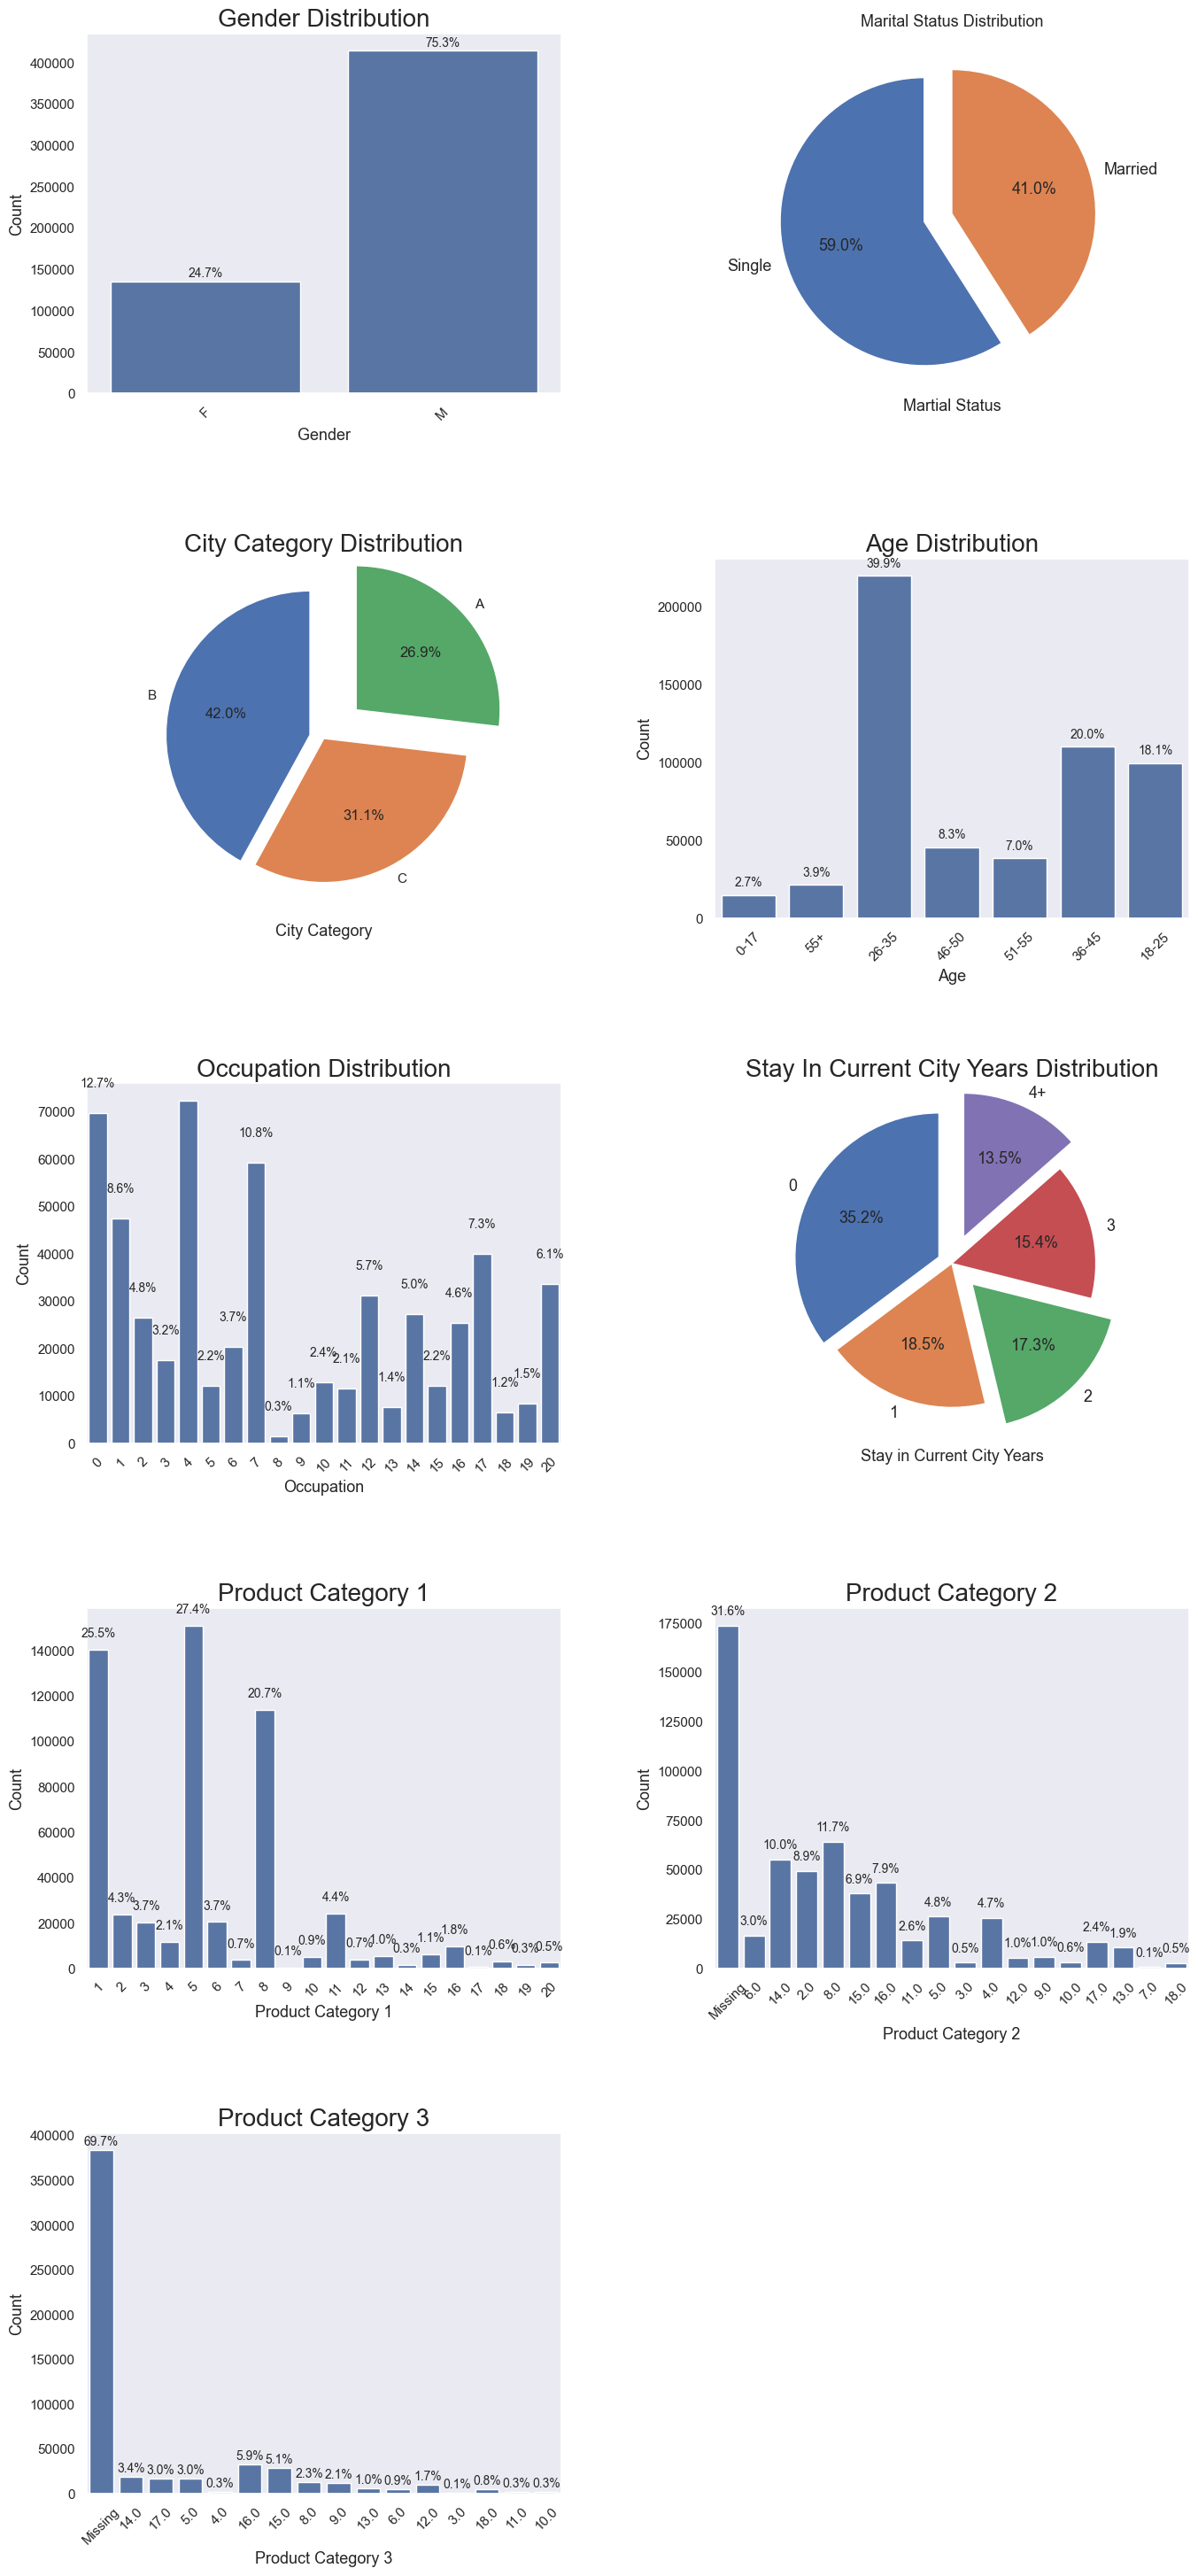

In [21]:
plt.figure(figsize=(15,30))
bar("Gender", "Count", "Gender Distribution", 1, data)
pie('Marital_Status', 'Marital Status Distribution', 2, data)
pie("City_Category", "City Category Distribution", 3, data)
bar("Age", "Count", "Age Distribution", 4, data)
bar("Occupation", "Count", "Occupation Distribution", 5, data)
pie('Stay_In_Current_City_Years', "Stay in Current City Years", 6, data)
bar("Product_Category_1", "Count", "Product Category 1", 7, data)
bar("Product_Category_2", "Count", "Product Category 2", 8, data)
bar("Product_Category_3", "Count", "Product Category 3", 9, data)

##### **For Categorical Data**

In [22]:
categorical_columns = [
    'Gender',
    'Age',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status'
]


def plot_categorical_distributions(df, categorical_columns):
    # Determine the number of rows we need for our subplots grid
    n = len(categorical_columns)
    n_cols = 2  # You can adjust this to change the number of columns in the grid
    n_rows = n // n_cols + (n % n_cols > 0)  # Calculate rows needed based on the number of columns
    
    plt.figure(figsize=(15, n_rows * 4))  # Adjust figure size based on the number of rows
    
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        total = float(len(df))  # Convert to float for division to get percentages
        ax = sns.countplot(x=column, data=df, palette="viridis")
        plt.title(f'Distribution of {column}')
        
        # Adding annotations to bars
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
            
        plt.xticks(rotation=45)  # Rotate labels to prevent overlap
        plt.tight_layout()

    plt.show()



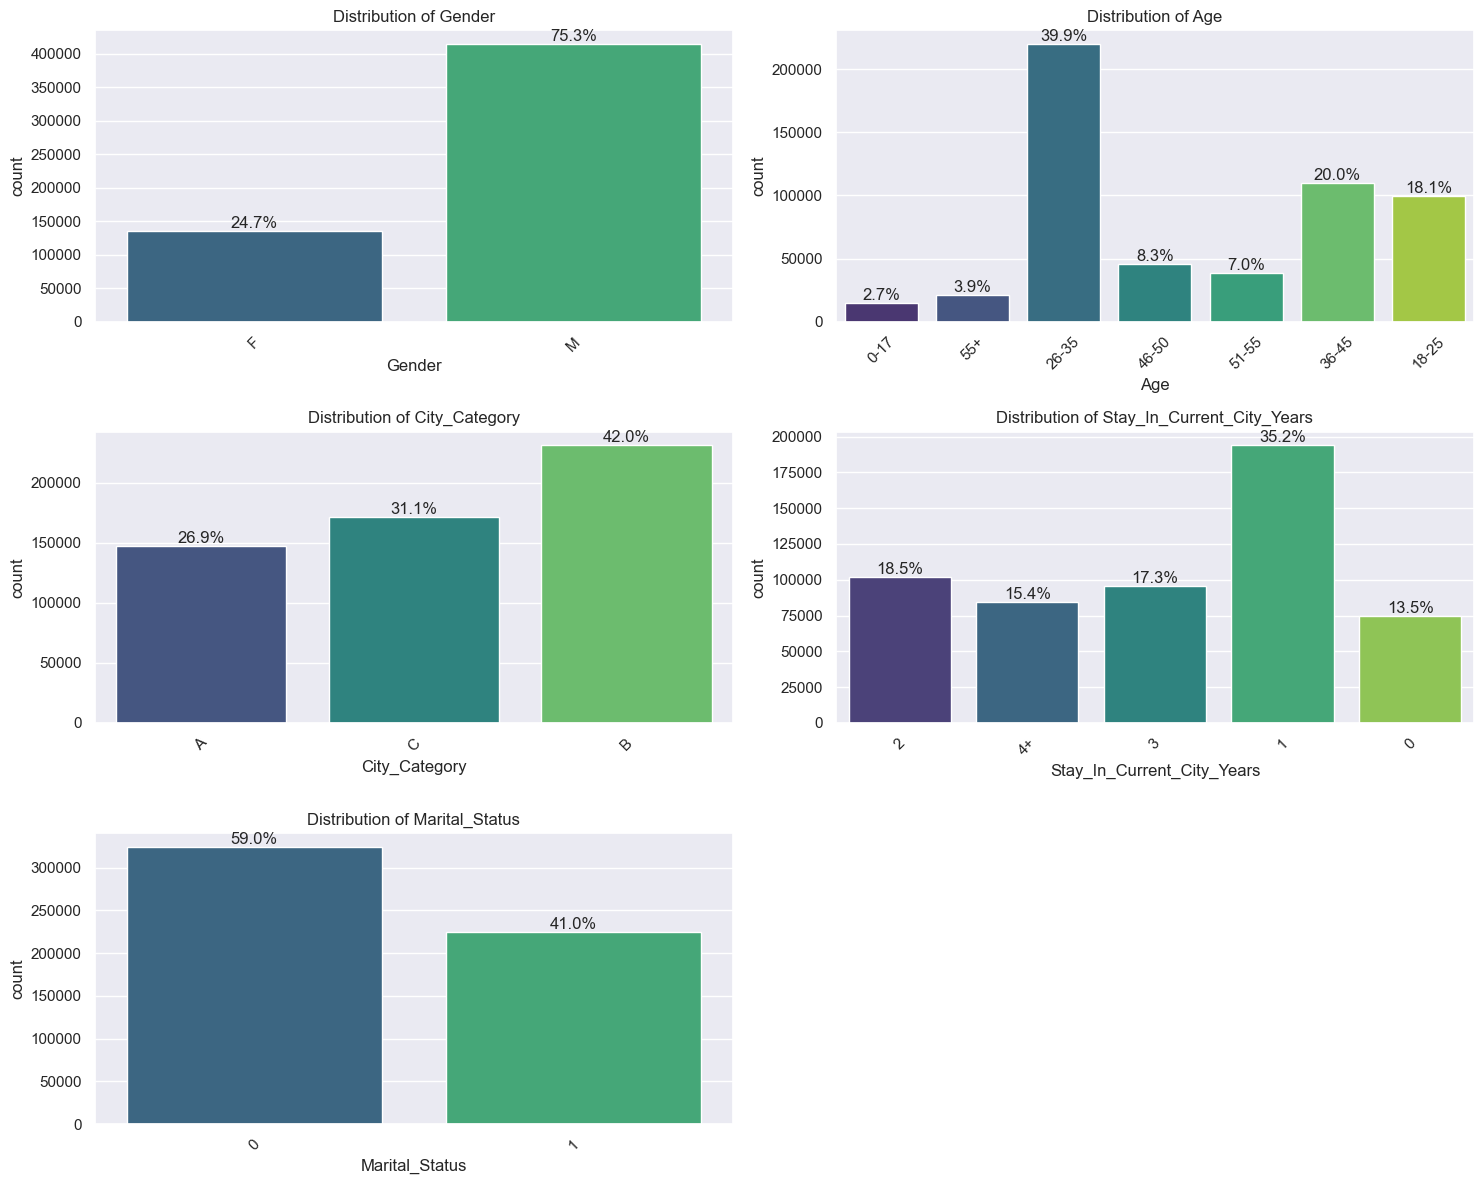

In [23]:
plot_categorical_distributions(df, categorical_columns)

Insight:

- We have more male customer than female. More then double of female.
- Our customer are likely to be single than married.
- We have more customer staying in city category "B" then other city categories.
- Our major age demograpy is between 26 to 35.
- We have more customer who stayed in current city "1" than other cities.

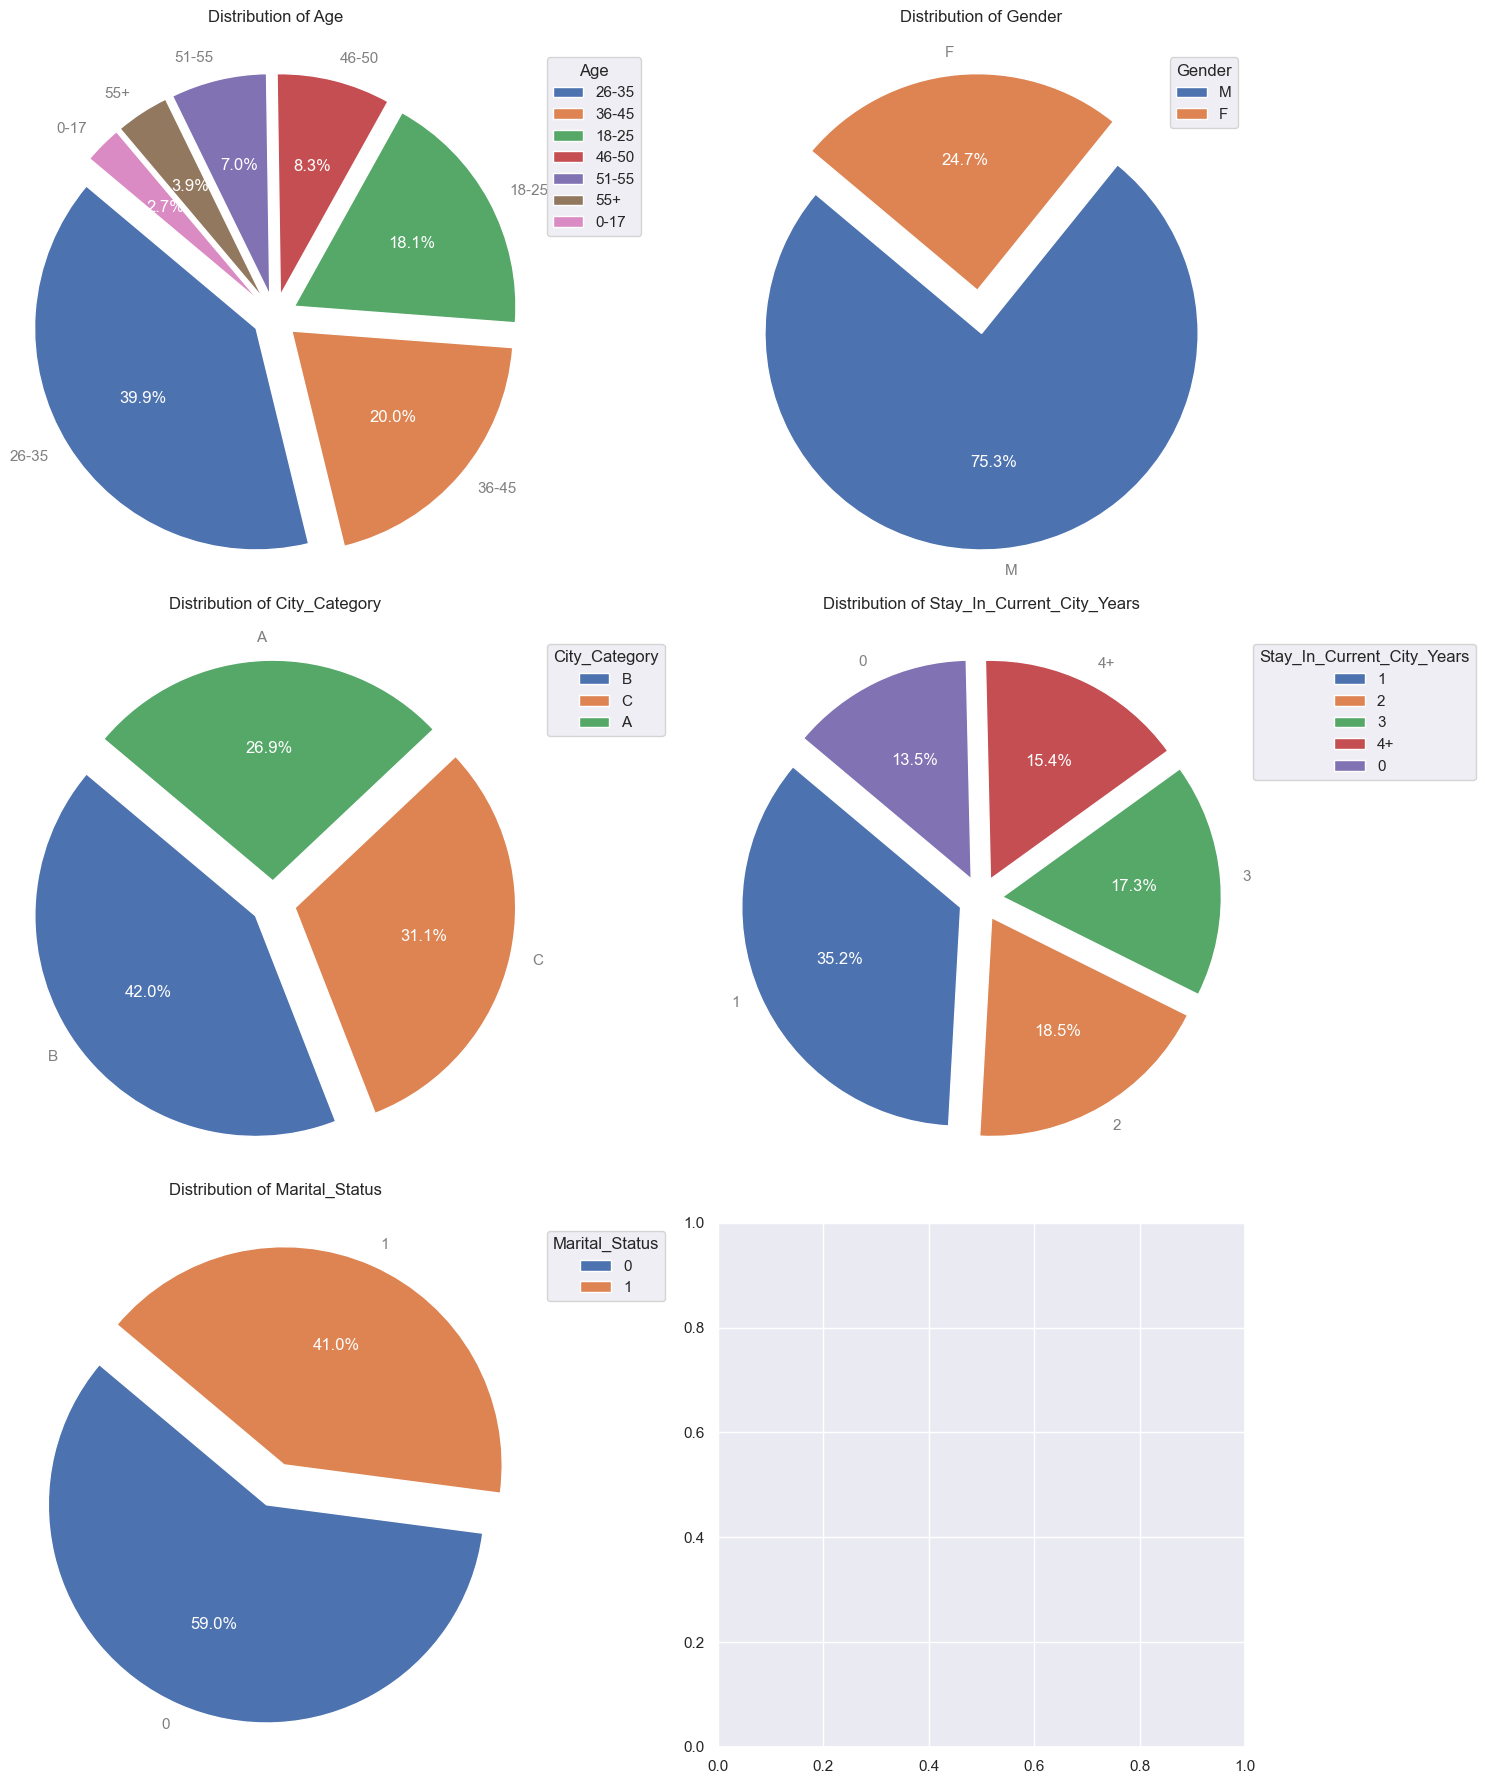

In [24]:
categorical_columns = [
     'Age',
    'Gender',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status'
]


def plot_categorical_distributions_pie(df, categorical_columns):
    # Determine the number of rows we need for our subplots grid
    n = len(categorical_columns)
    n_cols = 2  # You can adjust this based on preference
    n_rows = n // n_cols + (n % n_cols > 0)  # Calculate rows needed based on the number of columns
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 6))  # Adjust figure size based on the number of rows
    fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the space between plots

    # Flatten the axes array if more than one row
    if n_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for i, column in enumerate(categorical_columns):
        counts = df[column].value_counts()
        labels = counts.index
        sizes = counts.values
        explode = [0.1] * len(labels)  # Explode all slices slightly; adjust as needed
        
        # Plot pie chart and add legend
        wedges, texts, autotexts = axes[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                                startangle=140)
        
        # Improve legibility
        for text, autotext in zip(texts, autotexts):
            text.set_color('grey')
            autotext.set_color('white')
        
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        axes[i].set_title(f'Distribution of {column}', pad=20)  # Add padding to the title
        axes[i].legend(wedges, labels, title=column, loc="best", bbox_to_anchor=(1, 1))  # Place legend outside

    plt.tight_layout()
    plt.show()

# Call the function 
plot_categorical_distributions_pie(data, categorical_columns)


##### **For Numerical Data**

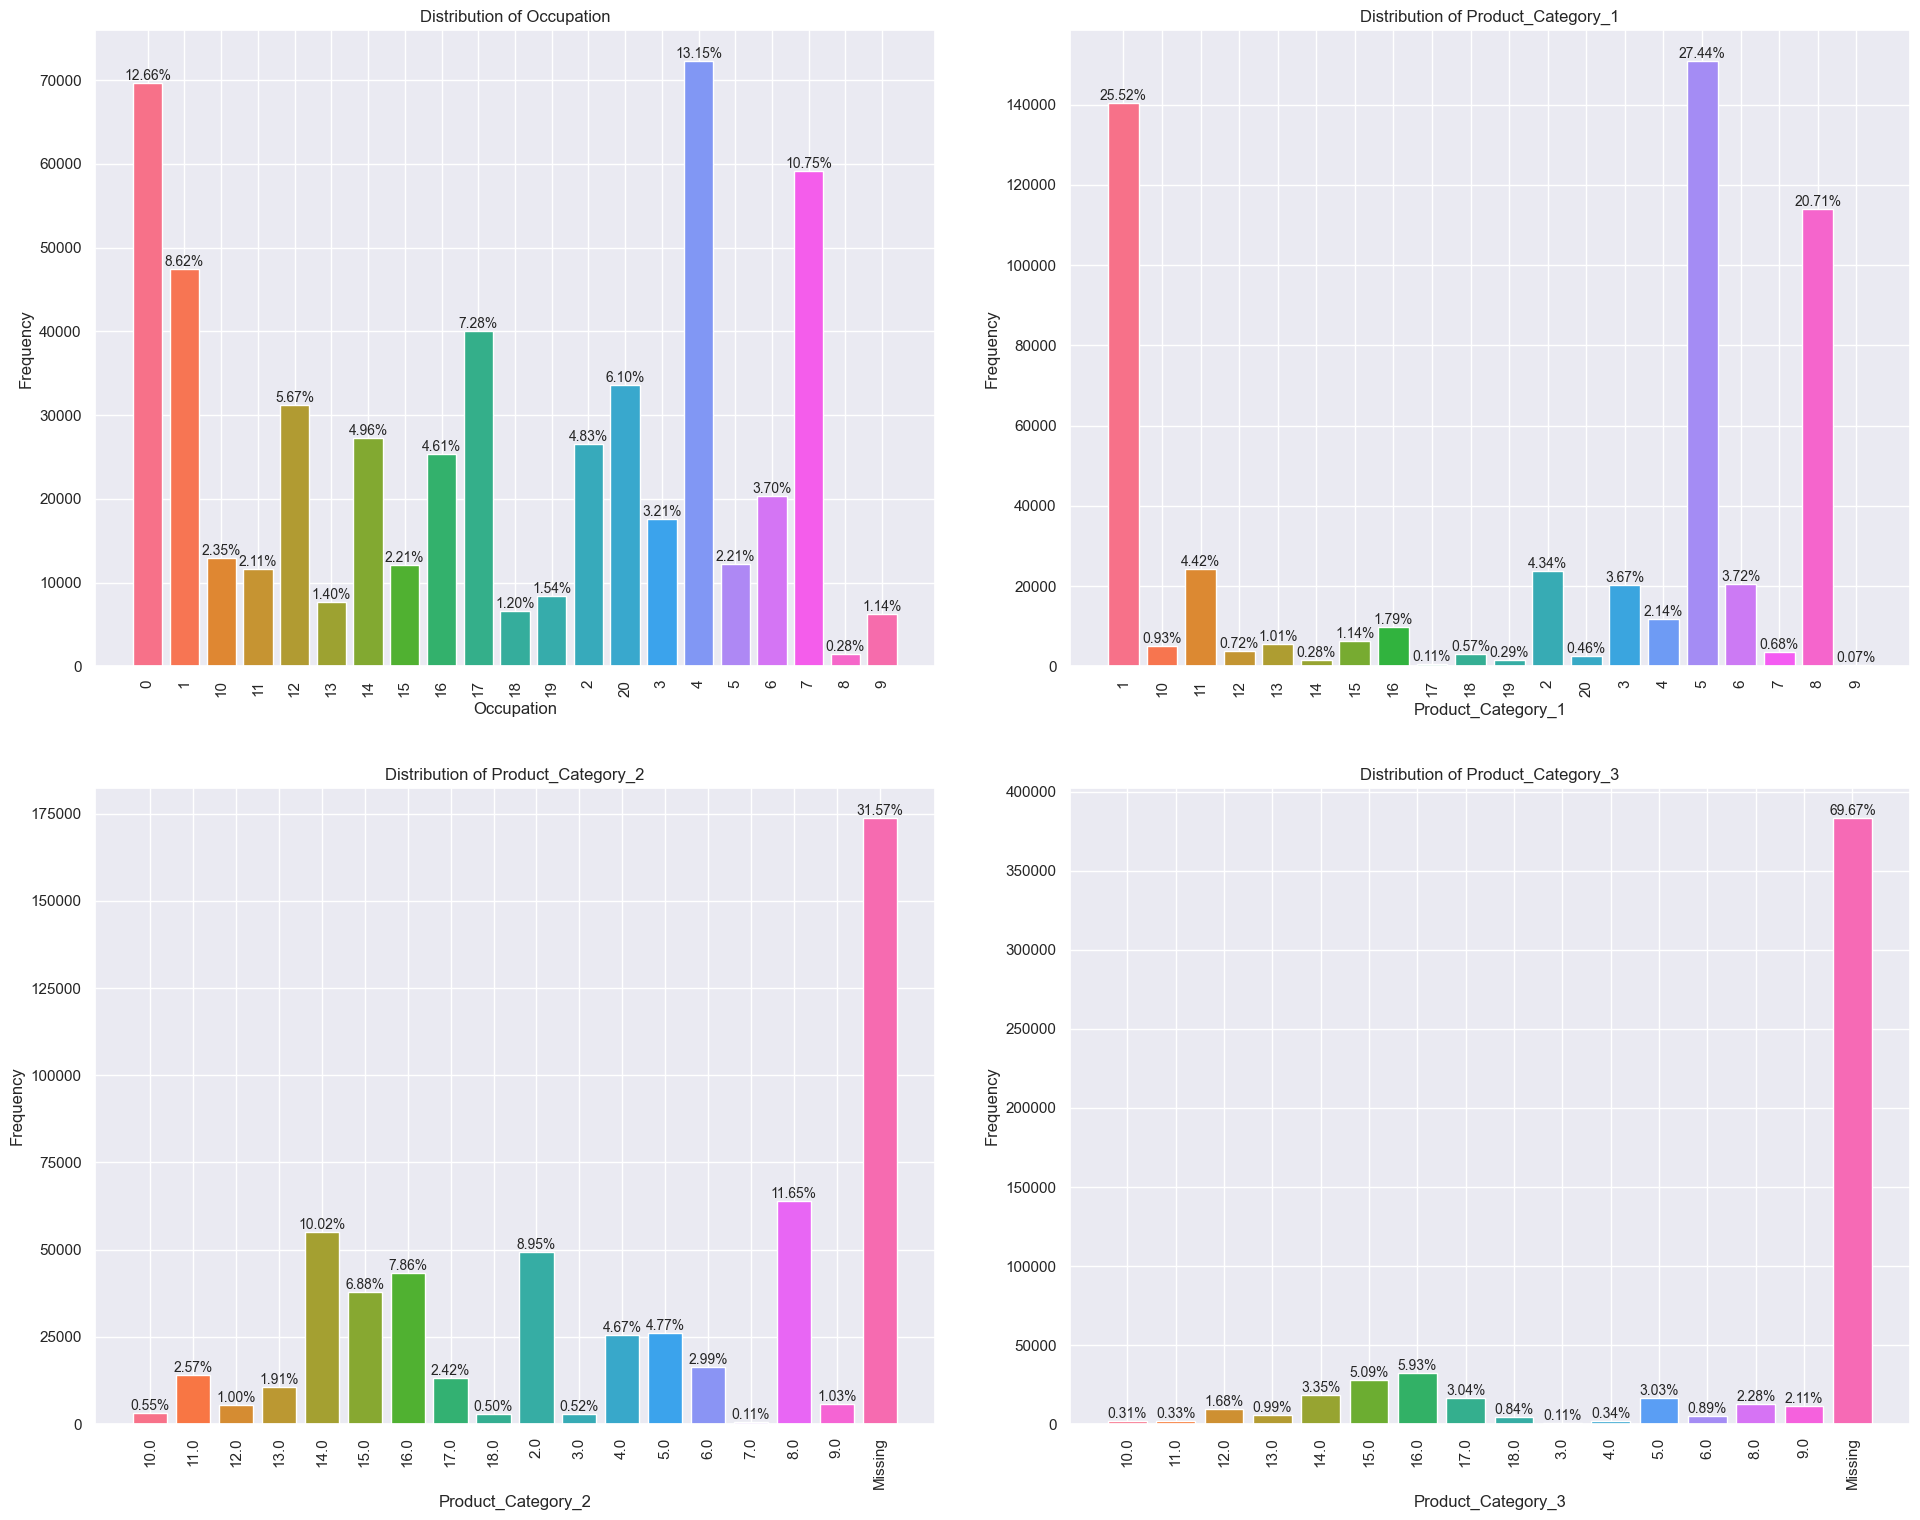

In [25]:
numerical_columns = [
    'Occupation',
    'Product_Category_1',
    'Product_Category_2',
    'Product_Category_3',
]

def plot_numerical_as_bar_with_nan_and_percentage(df, numerical_columns):
    # Determine the number of rows we need for our subplots grid
    n = len(numerical_columns)
    n_cols = 2  # Adjust this based on preference
    n_rows = n // n_cols + (n % n_cols > 0)  # Calculate rows needed based on the number of columns
    
    plt.figure(figsize=(20, n_rows * 8))  # Adjust figure size based on the number of rows
    
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Convert the column to string to ensure 'Missing' can be added, handle NaN values
        modified_column = df[column].astype('str').replace('nan', 'Missing')
        
        # Count the occurrence of each unique value including 'Missing'
        value_counts = modified_column.value_counts(dropna=False).sort_index()
        total_count = df[column].shape[0]  # Use original column count for percentage calculation to include NaN
        
        # Generate a color palette with a unique color for each bar
        colors = sns.color_palette('husl', n_colors=len(value_counts))
        
        # Plotting
        bars = plt.bar(value_counts.index, value_counts.values, color=colors)
        
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)  # Rotate the x-axis labels to make them readable
        
        # Annotate bars with percentage
        for bar in bars:
            height = bar.get_height()
            percentage = f"{(height / total_count):.2%}"
            plt.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom', fontsize=10)
        
        plt.tight_layout(pad=3.0)  # Add padding for layout improvement

    plt.show()

# Acall the function
plot_numerical_as_bar_with_nan_and_percentage(data, numerical_columns)


##### **Quick loook into Feature Distribution by  Mean Purchases**

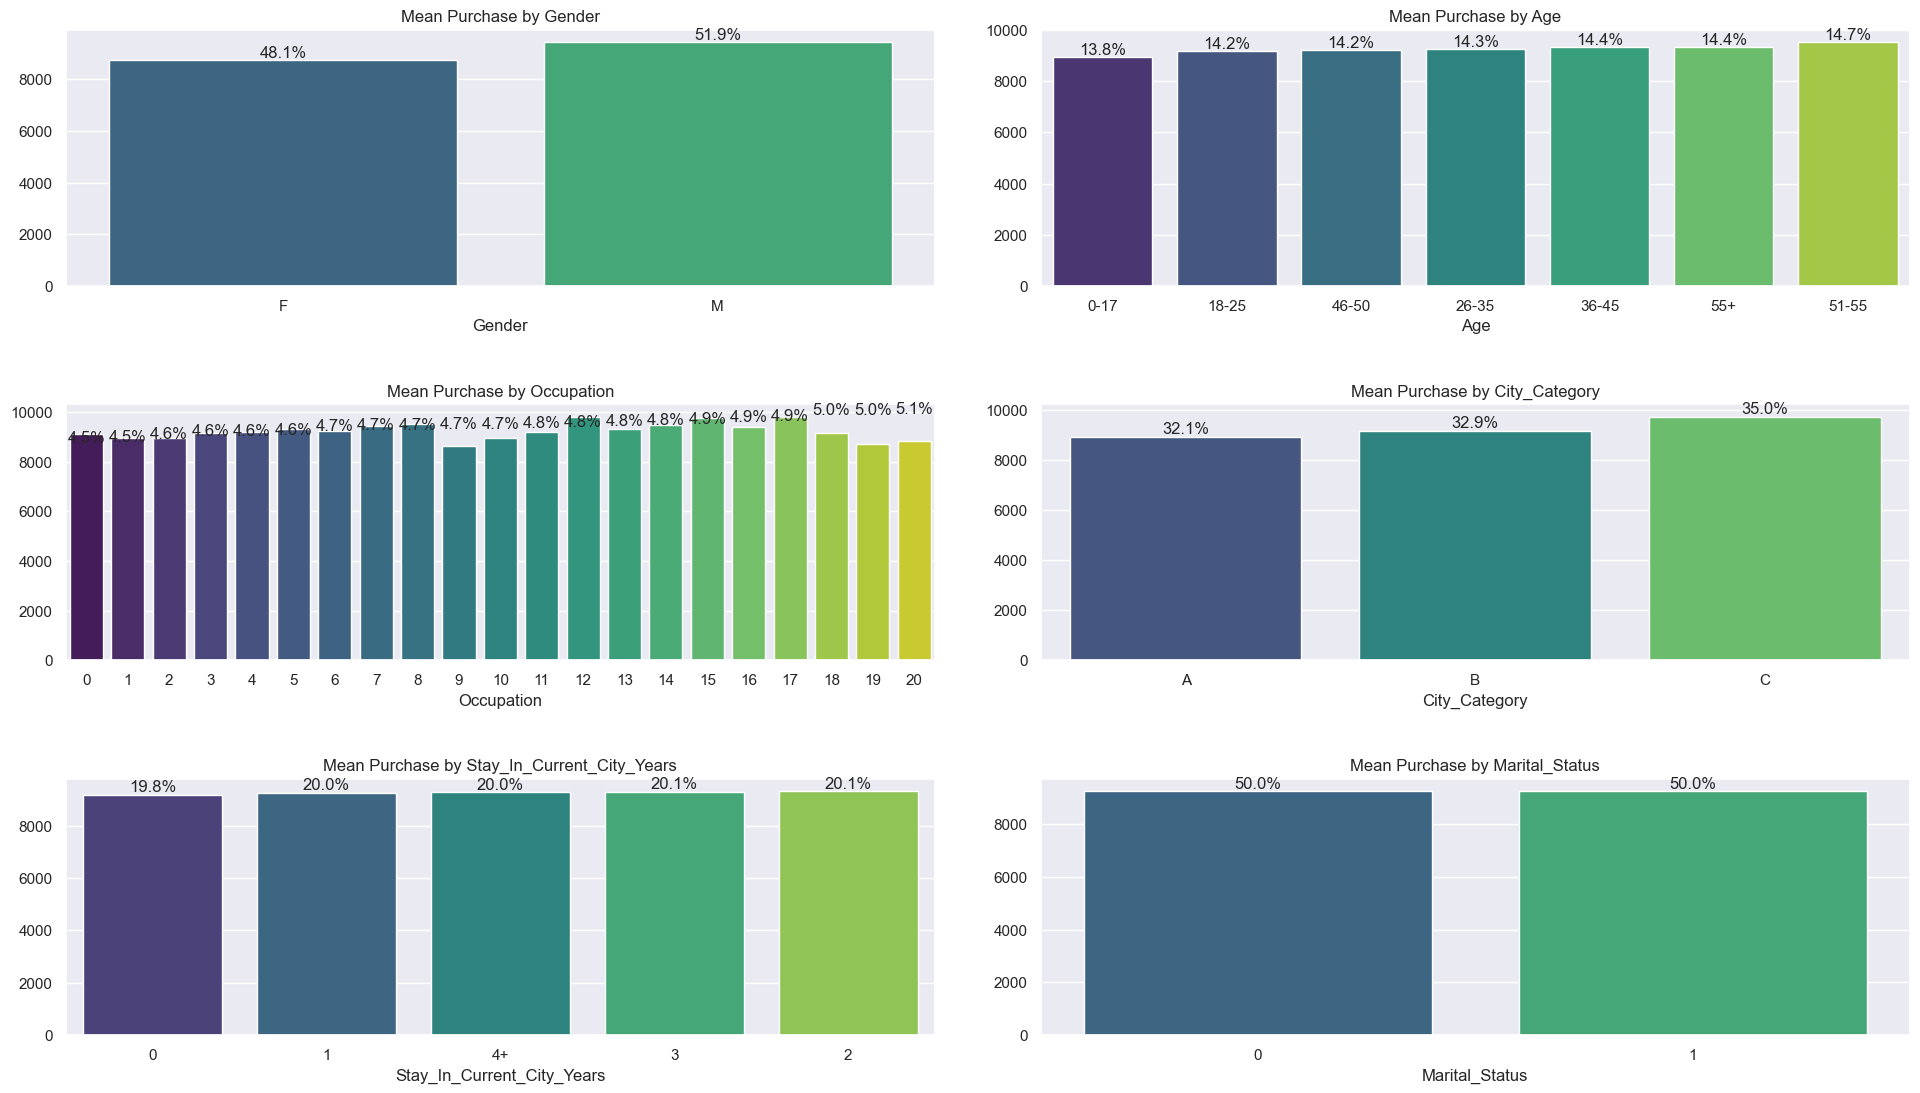

In [26]:
# List of categorical columns for EDA
categorical_columns = [
    'Gender',
    'Age',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status'
]

# # Calculate mean purchase for each category and visualize
# plt.figure(figsize=(20, 10))
# for i, column in enumerate(categorical_columns, 1):
#     plt.subplot(4, 2, i)
#     mean_purchase = df.groupby(column)['Purchase'].mean().sort_values()
#     sns.barplot(y=mean_purchase.values, x=mean_purchase.index, palette="viridis")
#     plt.title(f'Mean Purchase by {column}')
#     plt.tight_layout()

# plt.show()

plt.figure(figsize=(20, 15))  # Increased figure size for better readability
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    mean_purchase = df.groupby(column)['Purchase'].mean().sort_values(ascending=True)
    
    # Calculate total mean purchase for normalization
    total_mean_purchase = mean_purchase.sum()
    
    sns.barplot(y=mean_purchase.values, x=mean_purchase.index, palette="viridis")
    plt.title(f'Mean Purchase by {column}')
    
    # Annotate each bar with the percentage of the total mean purchase
    for index, value in enumerate(mean_purchase.values):
        percentage = f"{(value / total_mean_purchase * 100):.1f}%"  # Calculate percentage of total
        plt.text(index, value, percentage, ha='center', va='bottom')
    
    plt.tight_layout(pad=3.0)  # Adjusted padding for better layout

plt.show()

#### **Correlation**

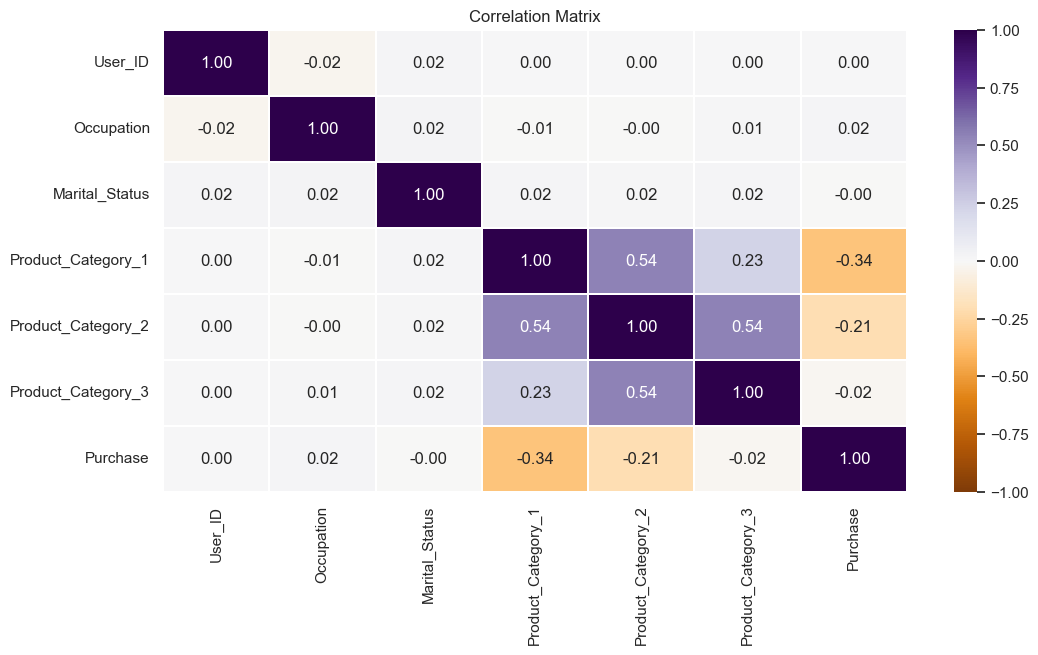

In [27]:
# Correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, vmax=1, vmin=-1, center=0, cmap= "PuOr",  linewidth =0.1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Identify Outliers and Anomalies

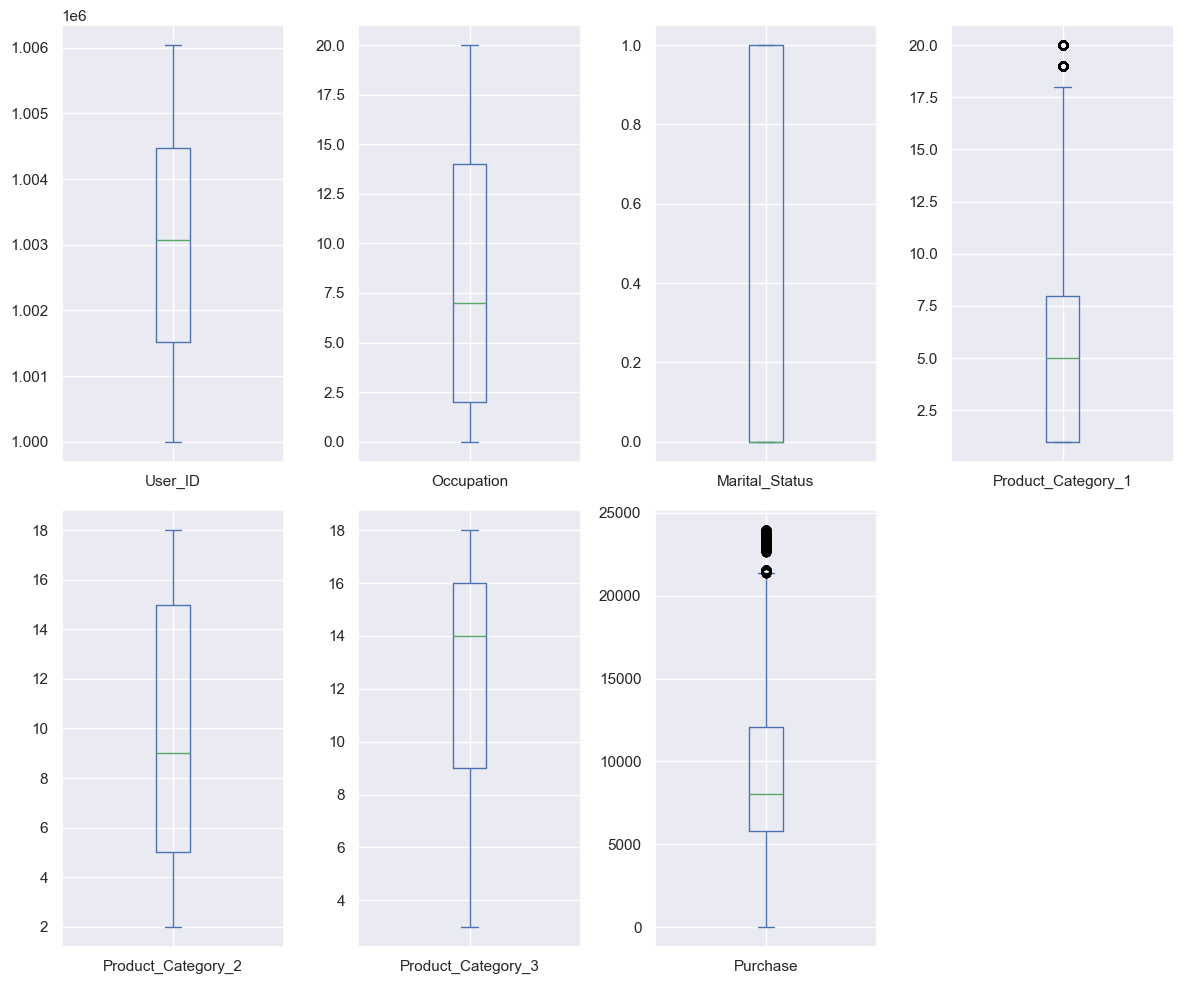

In [28]:
#  Quick overview of multiple columns
df.select_dtypes(include=['number']).plot(kind='box', subplots=True, layout=(2,4), figsize=(12, 10))
plt.tight_layout();

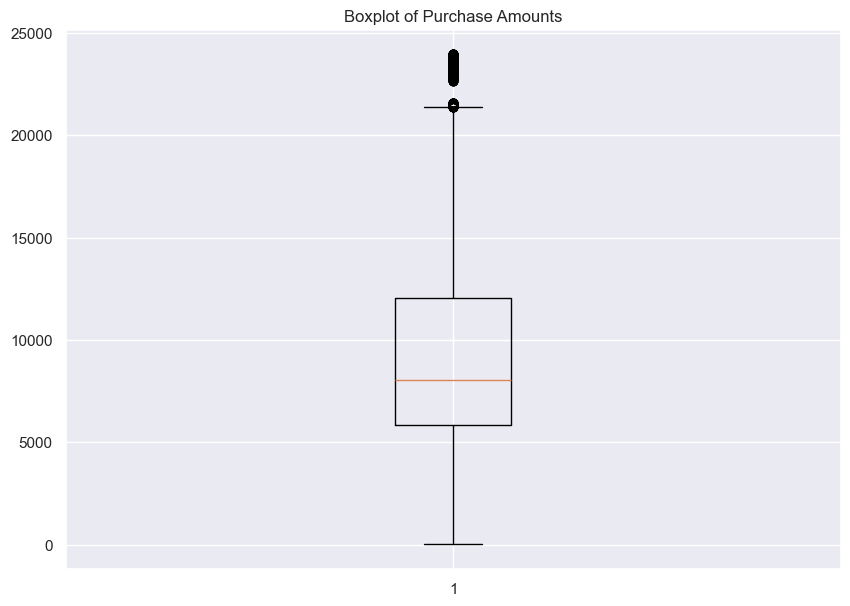

In [29]:
# Outliers for a numerical column, e.g., 'Purchase'
plt.figure(figsize=(10, 7))
plt.boxplot(df.Purchase, vert=True)
plt.title('Boxplot of Purchase Amounts');
# plt.show()

Insight:
    
- Outliers are located in the highest section (price range).

**Get the value of the outlier**

In [30]:
## Get the value of the outlier

##Upper Boundary: Q3 + 1.5*IQR
Q1 = df.Purchase.quantile(0.25)
Q3 = df.Purchase.quantile(0.75)
IQR = Q3 - Q1
IQR
upper_Boundary = Q3 + 1.5 * IQR
print(f"The Upper Boundary is: {upper_Boundary}%")

The Upper Boundary is: 21400.5%


Interpretation:
    
- The outlier is between the inner upper boundary and the max.

In [31]:
# count of the outlier
amt = df.Purchase[df.Purchase > upper_Boundary].count()
print(f"The total amount of outlier is: {amt}")

The total amount of outlier is: 2677


Interpretation:

- The total amount of the outlier is 2677

In [32]:
#get the percent of the outlier
outlier_percent = (amt / df.Purchase.shape[0]).round(3) *100

print(f"Percentage of outliers: {outlier_percent}%")

Percentage of outliers: 0.5%


Insight:
    
- The outlier represents 5% of our data in the target variable.

**Check the outlier in Detail**

In [33]:
# Assuming 'Purchase' is your column of interest
outlier = data[data['Purchase'] > data['Purchase'].quantile(0.75) + 1.5 * (data['Purchase'].quantile(0.75) - data['Purchase'].quantile(0.25))]

print(outlier[['User_ID', 'Product_ID', 'Purchase', 'Product_Category_2', 'Product_Category_3']])

        User_ID Product_ID  Purchase  Product_Category_2  Product_Category_3
343     1000058  P00117642     23603                16.0                 NaN
375     1000062  P00119342     23792                13.0                 NaN
652     1000126  P00087042     23233                14.0                16.0
736     1000139  P00159542     23595                15.0                16.0
1041    1000175  P00052842     23341                15.0                 NaN
...         ...        ...       ...                 ...                 ...
544488  1005815  P00116142     23753                13.0                16.0
544704  1005847  P00085342     23724                13.0                 NaN
544743  1005852  P00202242     23529                16.0                 NaN
545663  1006002  P00116142     23663                13.0                16.0
545787  1006018  P00052842     23496                15.0                 NaN

[2677 rows x 5 columns]


In [34]:
# Ensure accurate counting of NaN values within these outliers for both categories
nan_count_category_2 = outlier['Product_Category_2'].isnull().sum()
nan_count_category_3 = outlier['Product_Category_3'].isnull().sum()

print(f"Number of NaN values in 'Product_Category_2' among outliers: {nan_count_category_2}")
print(f"Number of NaN values in 'Product_Category_3' among outliers: {nan_count_category_3}")

Number of NaN values in 'Product_Category_2' among outliers: 412
Number of NaN values in 'Product_Category_3' among outliers: 2036


In [35]:
# Get the percentage of the nan values.

# Filter those outliers where 'Product_Category_2' and 'Product_Category_3' is NaN
outliers_with_nan_category_2 = outlier[outlier['Product_Category_2'].isna()]
outliers_with_nan_category_3 = outlier[outlier['Product_Category_3'].isna()]


# Calculate the percentage of these specific outliers relative to all transactions
percentage_of_specific_outliers = (len(outliers_with_nan_category_2) / len(outlier)) * 100
percentage_of_specific_outliers_1 = (len(outliers_with_nan_category_3) / len(outlier)) * 100


print(f"Percentage of outliers in 'Purchase' where 'Product_Category_2' is NaN: {percentage_of_specific_outliers:.2f}%")
print(f"Percentage of outliers in 'Purchase' where 'Product_Category_3' is NaN: {percentage_of_specific_outliers_1:.2f}%")

Percentage of outliers in 'Purchase' where 'Product_Category_2' is NaN: 15.39%
Percentage of outliers in 'Purchase' where 'Product_Category_3' is NaN: 76.06%


Insight:
- 'Product_Category_2' Missing Among Outliers (15.39%): This indicates that a relatively small portion of the transactions considered as outliers (based on purchase amount) also have missing data in Product_Category_2.
- 'Product_Category_3' Missing Among Outliers (76.06%): A significant majority of outlier transactions lack data in Product_Category_3. This could suggest several scenarios:
    - High spending is more frequently associated with purchases that don't include products from Product_Category_3, possibly indicating that items in this category are generally lower in value or less commonly bought in combination with high-ticket items.
    - It could also highlight a data collection issue or a pattern where customers tend to buy fewer items from this category, leading to less available data for these high-value transactions.

##### Anomaly Detection

In [36]:
# Calculate the Z-score for each purchase
data['Purchase_Z'] = zscore(data['Purchase'])

# Consider records with a Z-score absolute value greater than 3 as potential anomalies
potential_anomalies = data[abs(data['Purchase_Z']) > 3]
print(potential_anomalies[['User_ID', 'Product_ID', 'Purchase']])

Empty DataFrame
Columns: [User_ID, Product_ID, Purchase]
Index: []


Insight:
- There seem to be no anomaly in the dataset.